In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [140]:
from scipy.integrate import odeint
#help(odeint)    # Uncomment to view the help file for this function

tau = 1
cMa0 = 1.57e8
t0 = 0.5
ts = 1e3
tf = 4.4
# Define a function which calculates the derivative
def dcMa_dt(cMa,t):
    return -cMa/tau

t = np.linspace(t0,4.4,ts)
cMa = odeint(dcMa_dt, cMa0, t)
t = np.append(np.linspace(0,t0,ts*(t0)/(tf-t0)), t)
cMa = np.array(cMa).flatten()
cMa_t_initial = np.empty(len(np.linspace(0,t0,ts*(t0)/(tf-t0))))
cMa_t_initial.fill(cMa0)
cMa = np.append(cMa_t_initial, cMa)

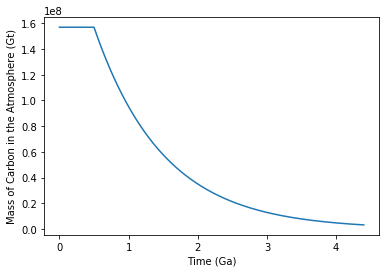

In [141]:
plt.plot(t, cMa)
plt.xlabel("Time (Ga)")
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)");

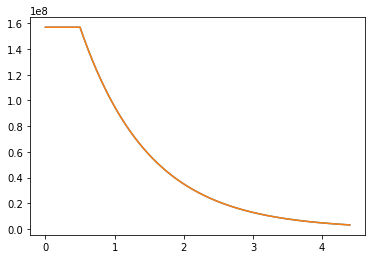

In [143]:
cMa_exact = np.piecewise(t, [t <= t0, t > t0], [lambda t: cMa0, lambda t: cMa0*np.exp((t0-t)/tau)])
plt.plot(t, cMa, t, cMa_exact, "-");


1.49024953386


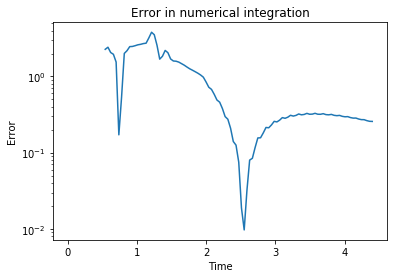

In [139]:
from numpy.linalg import norm
cMa_diff = np.abs(cMa_exact - cMa)
plt.semilogy(t, cMa_diff)
plt.ylabel("Error")
plt.xlabel("Time")
plt.title("Error in numerical integration");
print(numpy.sum(numpy.square(cMa_diff))/len(cMa_diff))
